# YOLOv5 훈련

In [1]:
!pwd

/data/FoodDetection/Object_Detection/yolov5-test/yolov5


In [2]:
import os
import shutil
from glob import glob

#datapath = '/data/FoodDetection/Object_Detection/yolov5-test/dataset/RDProject7_folder/images/'
datapath = '/data/Data_data/FoodDetection/data/food_detection/LunchBox/train_back/images/'

data_list = glob(datapath + '*')
#print(data_list)
f = open('./yolov5/train.txt', "w")
for i in data_list:
    f.write(''.join(i) + '\n')

In [4]:
datapath = '/data/Data_data/FoodDetection/data/food_detection/LunchBox/val_back/images/'

data_list = glob(datapath + '*')
#print(data_list)
f = open('./yolov5/val.txt', "w")
for i in data_list:
    f.write(''.join(i) + '\n')

In [16]:
datapath = '/data/Data_data/FoodDetection/data/food_detection/LunchBox/test/images/'

data_list = glob(datapath + '*')
#print(data_list)
f = open('./yolov5/test.txt', "w")
for i in data_list:
    f.write(''.join(i) + '\n')

# 터미널에서 실행해라

python -m torch.distributed.launch --nproc_per_node 2 train-gpu01.py --img 640 --batch 16 --epochs 300 --data /data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/yolov5/dki1000_all.yaml --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/yolov5x.pt --device 0,1

# 모델 결과 확인 코드

In [1]:
!pwd

/data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01


In [2]:
from IPython.display import Image # http://daplus.net/python-jupyter-notebook%EC%9D%98-%ED%8C%8C%EC%9D%BC%EC%97%90%EC%84%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC-%ED%91%9C%EC%8B%9C%ED%95%98%EB%A0%A4%EB%A9%B4-%EC%96%B4%EB%96%BB%EA%B2%8C%ED%95%B4%EC%95%BC/
import os
from glob import glob
import re

import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_location)

#matplotlib.rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

'/data/Data_data/FoodDetection/data/food_detection/LunchBox/test/1/dki_CU_12찬 한판 도시락_1_900007.jpg'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/14/dki_GS25_쏘야돈까스도시락_14_900001.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/14/dki_GS25_쏘야돈까스도시락_14_900001.jpg: pred:  tensor([[ 19.18668,  36.35196, 632.10388, 463.76193,   0.83704,  14.00000]])
14 0.84

 {'14': [[121, 128], [3982, 128], [3982, 2821], [121, 2821]]}
512x640 1 14s, Done. (0.981s)
Results saved to inference/output
Done. (9.896s)


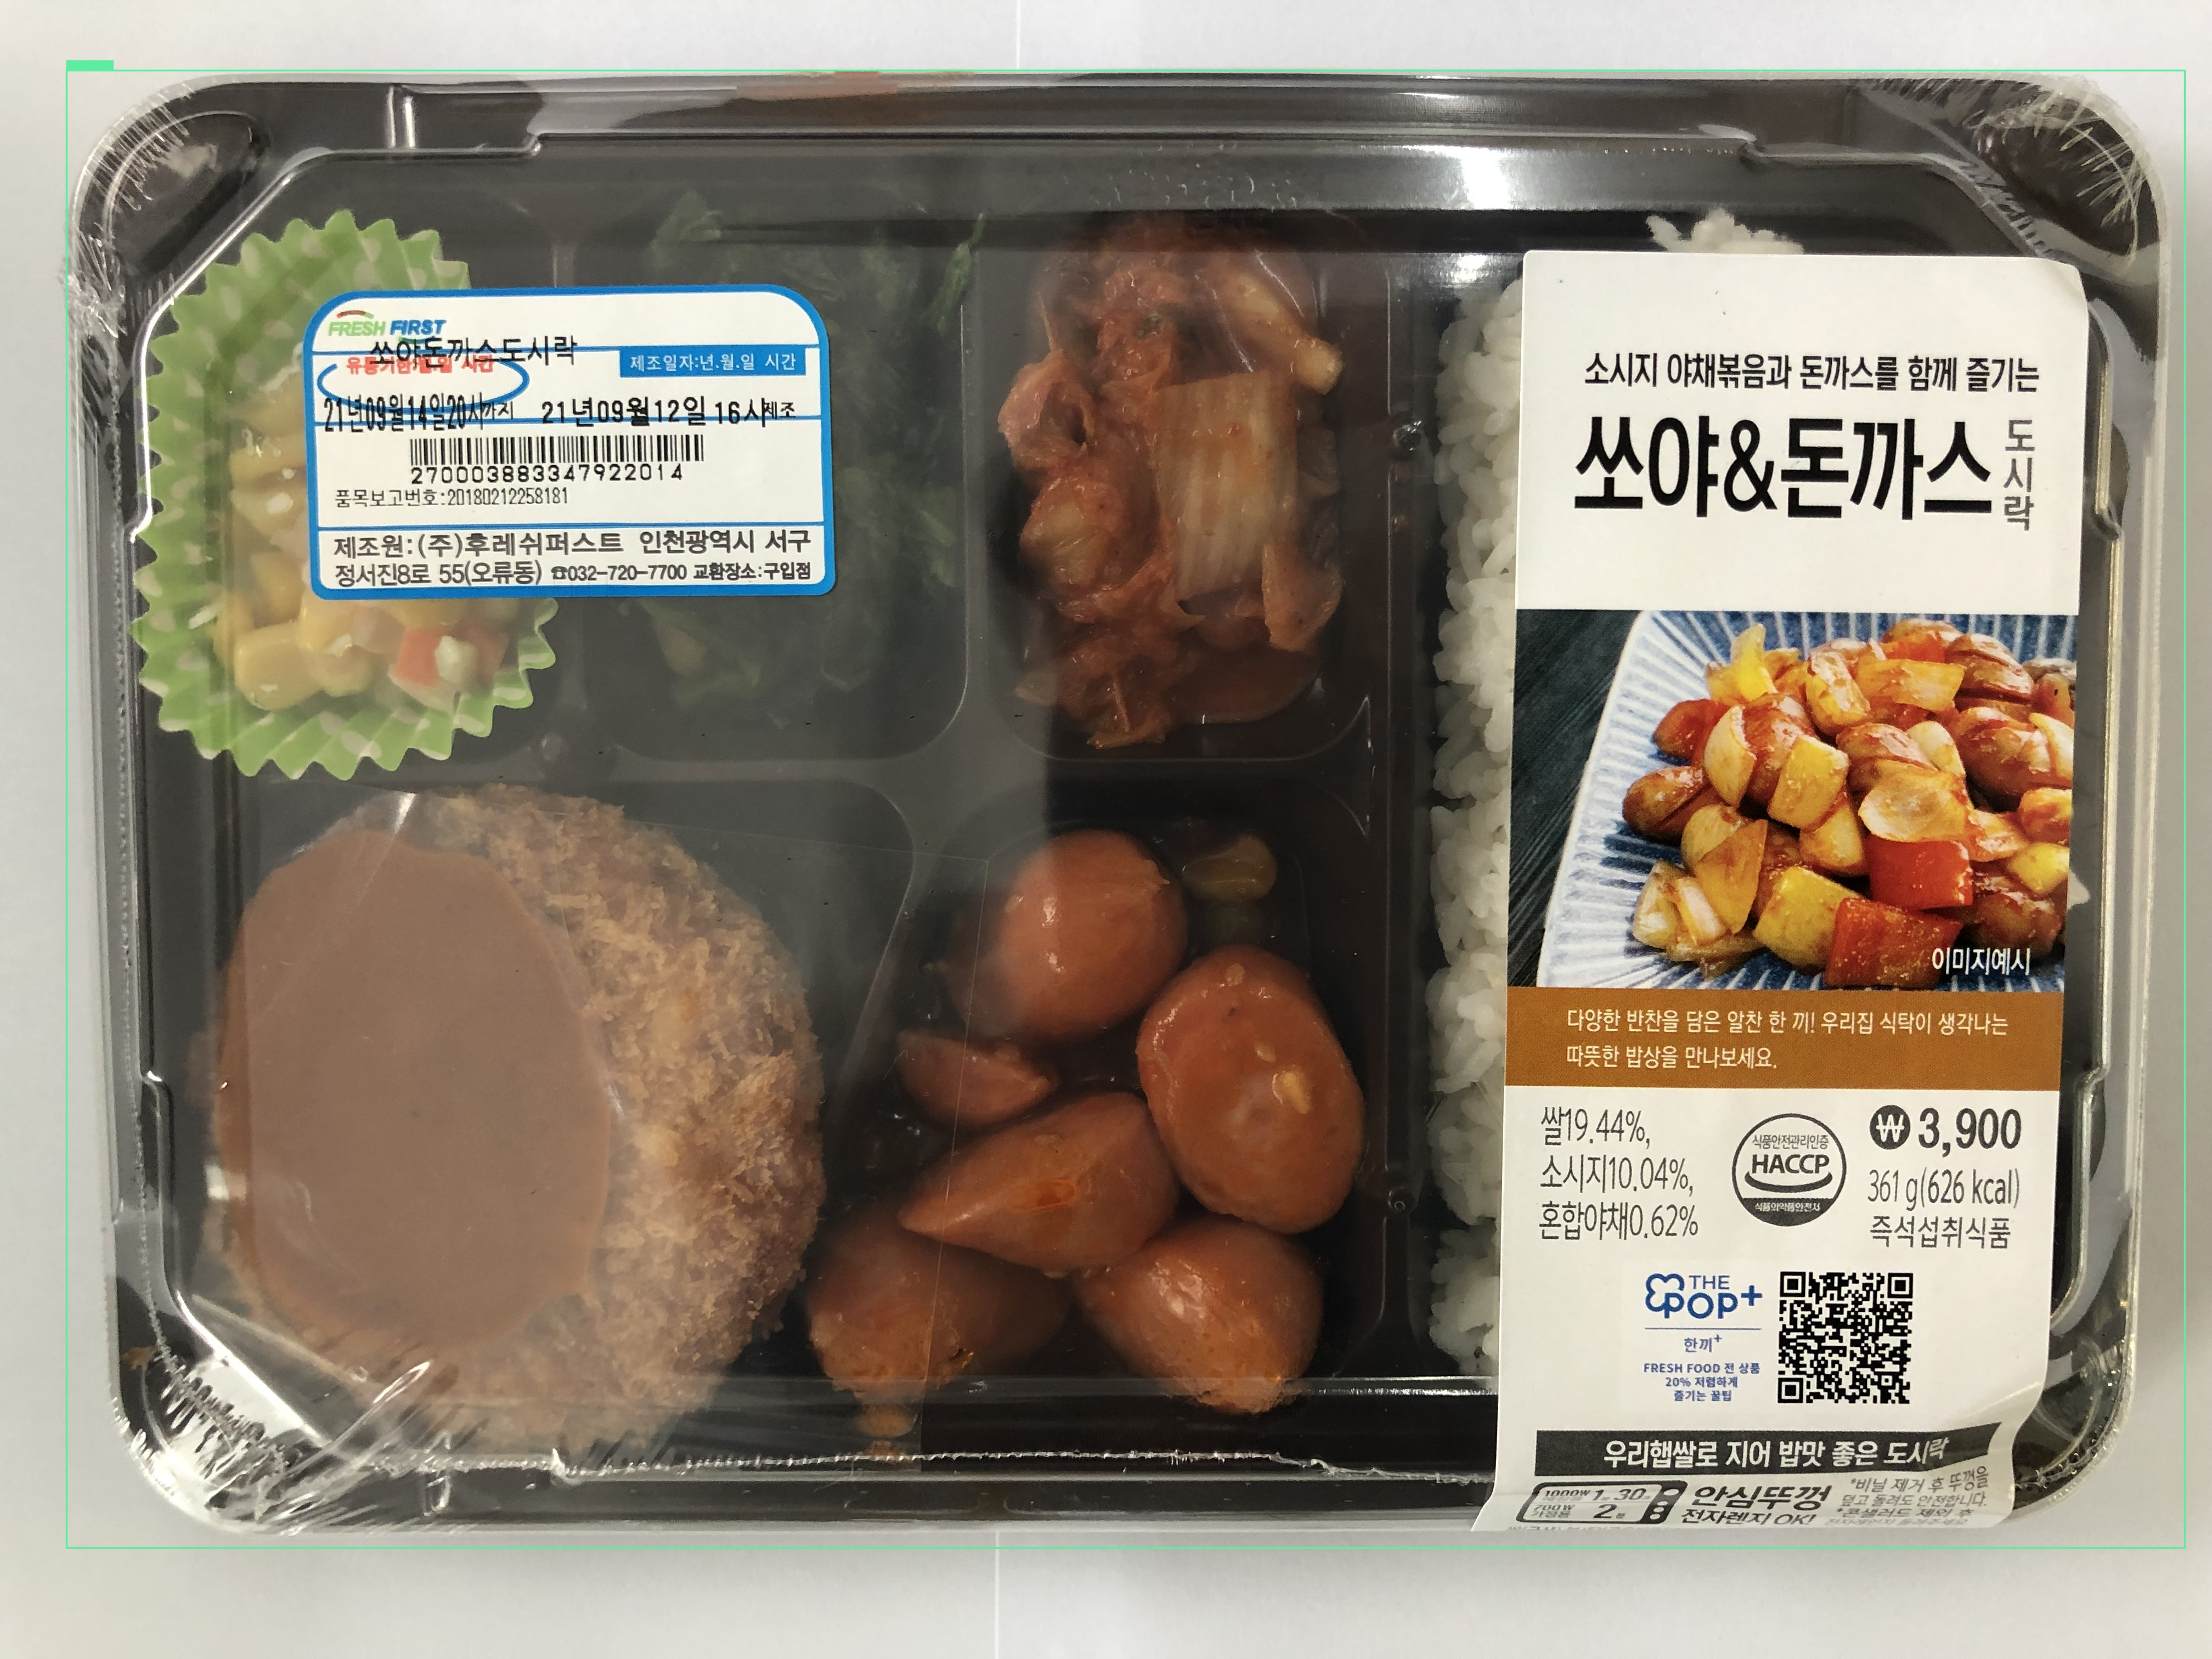

In [46]:
#matplotlib.rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

#val_img_path = '/Data/FoodDetection/Object_Detection/yolov5-test/yolov5/inference/images/dki_10036785.jpg'
val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/14/dki_GS25_쏘야돈까스도시락_14_900001.jpg'
# 다른 이미지를 확인하고 싶으면 인덱스만 바꾸면 된다. 
result_path = '/data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/inference/output'
    
    
!CUDA_VISIBLE_DEVICES=1 python ../detect.py --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt --img 640 --conf 0.5 --source "{val_img_path}" --device cpu
#!python detect.py --weights /Data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp404141414141_food40_yolov5m/weights/food40_best.pt --img 294 --conf 0.5 --source "{val_img_path}" --device cpu

# Image(os.path.join(result_path, os.path.basename(val_img_path)))
Image(os.path.join(result_path)+'/'+os.path.basename(val_img_path))

In [3]:
val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/도시락/'
os.listdir(val_img_path)

['CU_고기듬뿍불고기백반_65.jpg',
 'CU_남도떡갈비정식_45.jpg',
 'CU_6찬정식_60.jpg',
 'CU_모두의급식 버섯불고기_4.jpg',
 'CU_정통탕수육과새콤유린기_70.jpg',
 'CU_함박&돈까스_8.jpg',
 'GS25_NEW고기진짜많구나도시락_73.jpg',
 'GS25_미니도시락(소시지편)_78.jpg',
 'GS25_소이갈릭치밥_83.jpg',
 'GS_쏘야돈까스도시락_14.jpg',
 '미니스톱_뉴NEW언양식바싹불고기도시락_90.jpg',
 '세븐일레븐_김치제육덮밥_34.jpg',
 '이마트24_반반고기정찬도시락_103.jpg',
 '이마트24_올뉴기찬도시락_24.jpg',
 'Image Pasted at 2021-11-23 11-00.png']

In [27]:
# 다양한 파일 형식 jpg로 통일!

val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/도시락'
imgs = os.listdir(val_img_path)

for img in imgs:
    if img.split('.')[-1] != 'jpg':
#         print(img.split('.')[0])
        os.rename(val_img_path+'/'+img, val_img_path+'/'+img.split('.')[0]+'.jpg')

In [28]:
val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/도시락/'
imgs = os.listdir(val_img_path)

for img in imgs:
    # 다른 이미지를 확인하고 싶으면 인덱스만 바꾸면 된다.
    
    result_path = '/data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/inference/output'
    
    !python ../detect.py --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt --img 640 --conf 0.5 --source "{val_img_path+img}" --device cpu
    
    # Image(os.path.join(result_path, os.path.basename(val_img_path)))
#     Image(os.path.join(result_path)+'/'+img)
    print('=='*20)

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍불고기백반_65.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍불고기백반_65.jpg: pred:  tensor([[-2.42554e-01,  3.47869e+01,  6.40045e+02,  4.80612e+02,  8.09522e-01,  7.00000e+00]])
7 0.81

 {'7': [[0, 22], [807, 22], [807, 584], [0, 584]]}
512x640 1 7s, Done. (0.990s)
Results saved to inference/output
Done. (9.671s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_김치제육덮밥_34.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_김치제육덮밥_34.jpg: pred:  None
512x640 Done. (1.001s)
Results saved to inference/output
Done. (9.719s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/이마트24_반반고기정찬도시락_103.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍김치제육볶음_64_1.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍김치제육볶음_64_1.jpg: pred:  None
448x640 Done. (0.890s)
Results saved to inference/output
Done. (9.577s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍김치제육볶음_64_2.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/run

448x640 1 9s, Done. (0.881s)
Results saved to inference/output
Done. (9.371s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_코코넛쉬림프커리_72_1.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_코코넛쉬림프커리_72_1.jpg: pred:  tensor([[115.18280,  16.62697, 522.41095, 315.78448,   0.80677,  72.00000]])
72 0.81

 {'72': [[115, 12], [522, 12], [522, 310], [115, 310]]}
320x640 1 72s, Done. (0.698s)
Results saved to inference/output
Done. (9.362s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inf

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/GS25_매콤바비큐치밥_13_1.jpg: pred:  None
512x640 Done. (0.965s)
Results saved to inference/output
Done. (9.702s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/GS25_반반한고기밥상_80_2.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/GS25_반반한고기밥상_80_2.jpg: pred:  None
512x640 Done. (0.999s)
Results saved to inference/output
Done. (9.834s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/GS25_소이갈릭치밥_83_1.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/GS25_소이갈릭치밥_83_1.jpg: pred:  None
512x640 Done. (1.070s)
Results saved to inference/output
Done. (9.864s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/GS25_쏘야돈까스도시락_14.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp1

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/미니스톱_연탄불고기도시락_98_2.jpg: pred:  tensor([[2.86804e-01, 2.79024e+01, 6.39960e+02, 4.90983e+02, 8.74043e-01, 9.80000e+01]])
98 0.87

 {'98': [[0, 15], [800, 15], [800, 594], [0, 594]]}
512x640 1 98s, Done. (1.033s)
Results saved to inference/output
Done. (9.844s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_11겹등심돈까스도시락_47_2.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_11겹등심돈까스도시락_47_2.jpg: pred:  None
640x51

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_오색잡채_42_1.jpg: pred:  None
512x640 Done. (0.956s)
Results saved to inference/output
Done. (9.651s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_오징어볶음&닭강정편_54_1.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_오징어볶음&닭강정편_54_1.jpg: pred:  None
512x640 Done. (0.977s)
Results saved to inference/output
Done. (9.658s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', im

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/이마트24_푸짐한 제육&불고기 도시락_30_1.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/이마트24_푸짐한 제육&불고기 도시락_30_1.jpg: pred:  None
640x512 Done. (0.981s)
Results saved to inference/output
Done. (9.593s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/이마트24_푸짐한 제육&불고기 도시락_30_2.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/y

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_밥은먹고다니자얘들아 스테이크편_50_1.jpg: pred:  tensor([[ 14.79861,  53.31578, 631.60461, 440.60260,   0.89947,  50.00000]])
50 0.90

 {'50': [[16, 40], [690, 40], [690, 463], [16, 463]]}
512x640 1 50s, Done. (0.940s)
Results saved to inference/output
Done. (9.623s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_밥은먹고다니자얘들아 스테이크편_50_2.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/세븐일레븐_밥은먹고다니자얘들아 스테이크편_50_2.jpg: pred:  No

- 결과 한꺼번에 여러 이미지 다 보고싶을 때

In [ ]:
p = re.compile(r'[_]\d*[_]')
        m = p.search(file)
        num = m.group()[1:-1]

In [19]:
def class_test(num):
    path = f'/data/Data_data/FoodDetection/data/inspection/도시락/{num}/'
    f_list = glob(path + '*.jpg')
    
    print(num)
    for i in f_list:
        val_img_path = i
        !CUDA_VISIBLE_DEVICES=0,1 python ../detect-test2.py --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt --img 640 --conf 0.5 --source "{val_img_path}" 
        Image(os.path.join('/data/FoodDetection/Object_Detection/yolov5-test/yolov5/inference/output/', os.path.basename(val_img_path)))
        print('===='*10)

In [20]:
path = '/data/Data_data/FoodDetection/data/inspection/도시락'
folders = sorted(os.listdir(path))

for folder in folders:
    class_test(folder)
    print('===='*10)
    print('===='*10)
    print('===='*10)

1
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/1/dki_CU_12찬 한판 도시락_1_900007.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/1/dki_CU_12찬 한판 도시락_1_900007.jpg: pred:  tensor([[ 88.50000, 107.25000, 584.50000, 413.75000,   0.95801,   1.00000]], device='cuda:0')
1 0.96

 {'1': [[467, 482], [3081, 482], [3081, 2098], [467, 2098]]}
512x640 1 1s, Done. (0.036s)
Results saved to inference/output


640x512 1 1s, Done. (0.037s)
Results saved to inference/output
Done. (0.407s)
10
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/10/dki_GS25_New엄마의6찬도시락_10_900002.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/10/dki_GS25_New엄마의6찬도시락_10_900002.jpg: pred:  tensor([[ 20.50000, 165.50000, 483.00000, 492.50000,   0.93457,  10.00000]], device='cuda:0')
10 0.93

 {'10': [[14, 517], [1459, 517], [

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/100/dki_미니스톱_트리플까스햄볶음밥_100_900020.jpg: pred:  tensor([[ 58.00000, 214.37500, 447.75000, 493.00000,   0.97510, 100.00000]], device='cuda:0')
100 0.98

 {'100': [[265, 1351], [2720, 1351], [2720, 3106], [265, 3106]]}
640x512 1 100s, Done. (0.037s)
Results saved to inference/output
Done. (0.549s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/100/dki_미니스톱_트리플까스햄볶음밥_100_900039.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_ba

Results saved to inference/output
Done. (0.550s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/101/dki_이마트24_기내식감성프라하편_101_900012.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/101/dki_이마트24_기내식감성프라하편_101_900012.jpg: pred:  tensor([[ 53.87500, 177.12500, 459.50000, 469.50000,   0.94824, 101.00000]], device='cuda:0')
101 0.95

 {'101': [[239, 1116], [2794, 1116], [2794, 2958], [239, 2958]]

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/102/dki_이마트24_기내식감성한국편_102_900005.jpg: pred:  tensor([[109.12500, 248.50000, 401.50000, 458.50000,   0.93408, 102.00000]], device='cuda:0')
102 0.93

 {'102': [[587, 1566], [2429, 1566], [2429, 2889], [587, 2889]]}
640x512 1 102s, Done. (0.037s)
Results saved to inference/output
Done. (0.547s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/102/dki_이마트24_기내식감성한국편_102_900027.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/103/dki_이마트24_반반고기정찬도시락_103_900006.jpg: pred:  tensor([[ 92.75000, 155.75000, 604.00000, 353.25000,   0.91260, 103.00000]], device='cuda:0')
103 0.91

 {'103': [[584, 880], [3805, 880], [3805, 2125], [584, 2125]]}
512x640 1 103s, Done. (0.037s)
Results saved to inference/output
Done. (0.432s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/103/dki_이마트24_반반고기정찬도시락_103_900007.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_ba

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/104/dki_이마트24_언양식매콤불고기한상도시락_104_900024.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/104/dki_이마트24_언양식매콤불고기한상도시락_104_900024.jpg: pred:  tensor([[ 51.37500, 190.75000, 434.00000, 476.25000,   0.86084, 104.00000]], device='cuda:0')
104 0.86

 {'104': [[223, 1202], [2633, 1202], [2633, 3000], [223, 3000]]}
640x512 1 104s, Done. (0.037s)
Results 

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/104/dki_이마트24_언양식매콤불고기한상도시락_104_900166.jpg: pred:  tensor([[ 46.50000, 230.87500, 417.50000, 488.00000,   0.83203, 104.00000]], device='cuda:0')
104 0.83

 {'104': [[192, 1455], [2529, 1455], [2529, 3074], [192, 3074]]}
640x512 1 104s, Done. (0.037s)
Results saved to inference/output
Done. (0.533s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/104/dki_이마트24_언양식매콤불고기한상도시락_104_900185.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 lay

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/105/dki_이마트24_춘천식닭갈비도시락_105_900169.jpg: pred:  tensor([[ 86.37500, 135.25000, 460.50000, 490.75000,   0.89697, 105.00000]], device='cuda:0')
105 0.90

 {'105': [[443, 852], [2800, 852], [2800, 3092], [443, 3092]]}
640x512 1 105s, Done. (0.037s)
Results saved to inference/output
Done. (0.554s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/105/dki_이마트24_춘천식닭갈비도시락_105_900176.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_ba

Results saved to inference/output
Done. (0.545s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/106/dki_이마트24_푸짐한제육정찬도시락_106_900162.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/106/dki_이마트24_푸짐한제육정찬도시락_106_900162.jpg: pred:  tensor([[146.25000, 181.37500, 423.75000, 476.00000,   0.96094, 106.00000]], device='cuda:0')
106 0.96

 {'106': [[821, 1143], [2569, 1143], [2569, 2999], [821, 2999

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/11/dki_GS25_NEW치킨도시락_11_900059.jpg: pred:  tensor([[ 49.50000,  56.75000, 433.00000, 607.00000,   0.95947,  11.00000]], device='cuda:0')
11 0.96

 {'11': [[211, 358], [2627, 358], [2627, 3824], [211, 3824]]}
640x512 1 11s, Done. (0.039s)
Results saved to inference/output
Done. (0.523s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/11/dki_GS25_NEW치킨도시락_11_900089.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', tot

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/12/dki_GS25_로제함박도시락_12_900081.jpg: pred:  tensor([[133.75000,  43.00000, 375.75000, 595.00000,   0.92920,  12.00000]], device='cuda:0')
12 0.93

 {'12': [[742, 271], [2266, 271], [2266, 3748], [742, 3748]]}
640x512 1 12s, Done. (0.037s)
Results saved to inference/output
Done. (0.419s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/12/dki_GS25_로제함박도시락_12_900091.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lu

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/13/dki_GS25_매콤바비큐치밥_13_900012.jpg: pred:  tensor([[ 39.62500,  35.75000, 516.50000, 475.50000,   0.95361,  13.00000]], device='cuda:0')
13 0.95

 {'13': [[250, 124], [3254, 124], [3254, 2895], [250, 2895]]}
512x640 1 13s, Done. (0.037s)
Results saved to inference/output
Done. (0.464s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/13/dki_GS25_매콤바비큐치밥_13_900069.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lu

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/15/dki_GS25_양념오븐구이도시락_15_900001.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/15/dki_GS25_양념오븐구이도시락_15_900001.jpg: pred:  tensor([[ 65.62500,  28.50000, 408.00000, 603.50000,   0.95508,  15.00000]], device='cuda:0')
15 0.96

 {'15': [[155, 89], [1225, 89], [1225, 1886], [155, 1886]]}
640x512 1 15s, Done. (0.037s)
Results saved to inference/ou

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/16/dki_GS25_주부9단 도시락_16_900011.jpg: pred:  tensor([[194.25000,  42.62500, 443.25000, 482.00000,   0.94043,  16.00000]], device='cuda:0')
16 0.94

 {'16': [[1224, 168], [2792, 168], [2792, 2936], [1224, 2936]]}
512x640 1 16s, Done. (0.038s)
Results saved to inference/output
Done. (0.454s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/16/dki_GS25_주부9단 도시락_16_900026.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 pa

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/17/dki_GS25_함박&치킨도시락_17_900021.jpg: pred:  tensor([[ 51.50000,  53.87500, 612.00000, 457.50000,   0.96191,  17.00000]], device='cuda:0')
17 0.96

 {'17': [[161, 118], [1912, 118], [1912, 1380], [161, 1380]]}
512x640 1 17s, Done. (0.037s)
Results saved to inference/output
Done. (0.189s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/17/dki_GS25_함박&치킨도시락_17_900061.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/18/dki_이마트24_광양식불고기도시락_18_900025.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/18/dki_이마트24_광양식불고기도시락_18_900025.jpg: pred:  tensor([[ 57.50000,  68.62500, 590.00000, 427.50000,   0.96094,  18.00000]], device='cuda:0')
18 0.96

 {'18': [[303, 278], [3110, 278], [3110, 2170], [303, 2170]]}
512x640 1 18s, Done. (0.037s)
Results saved to inferenc

640x512 1 18s, Done. (0.038s)
Results saved to inference/output
Done. (0.417s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/18/dki_이마트24_광양식불고기도시락_18_900143.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/18/dki_이마트24_광양식불고기도시락_18_900143.jpg: pred:  tensor([[123.00000,  94.50000, 425.00000, 516.50000,   0.95703,  18.00000]], device='cuda:0')
18 0.96

 {'18': [[674, 595], [2577, 595], [257

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/2/dki_CU_7찬 매콤 불고기_2_900001.jpg: pred:  tensor([[ 18.50000,  89.50000, 611.50000, 445.50000,   0.94922,   2.00000]], device='cuda:0')
2 0.95

 {'2': [[117, 463], [3852, 463], [3852, 2706], [117, 2706]]}
512x640 1 2s, Done. (0.037s)
Results saved to inference/output
Done. (0.448s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/2/dki_CU_7찬 매콤 불고기_2_900016.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/20/dki_이마트24_매콤닭갈비&돈까스도시락_20_900021.jpg: pred:  tensor([[ 36.50000, 112.62500, 608.00000, 417.00000,   0.94141,  20.00000]], device='cuda:0')
20 0.94

 {'20': [[192, 510], [3205, 510], [3205, 2115], [192, 2115]]}
512x640 1 20s, Done. (0.037s)
Results saved to inference/output
Done. (0.312s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/20/dki_이마트24_매콤닭갈비&돈까스도시락_20_900028.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_bac

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/20/dki_이마트24_매콤닭갈비&돈까스도시락_20_900109.jpg: pred:  tensor([[103.37500,  55.50000, 426.50000, 559.00000,   0.94971,  20.00000]], device='cuda:0')
20 0.95

 {'20': [[550, 350], [2586, 350], [2586, 3522], [550, 3522]]}
640x512 1 20s, Done. (0.038s)
Results saved to inference/output
Done. (0.459s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/20/dki_이마트24_매콤닭갈비&돈까스도시락_20_900124.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_bac

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/21/dki_이마트24_석쇠불고기김밥_21_900024.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/21/dki_이마트24_석쇠불고기김밥_21_900024.jpg: pred:  tensor([[ 46.87500, 125.25000, 556.00000, 448.75000,   0.96729,  21.00000]], device='cuda:0')
21 0.97

 {'21': [[247, 577], [2931, 577], [2931, 2282], [247, 2282]]}
512x640 1 21s, Done. (0.035s)
Results saved to inference/ou

21 0.98

 {'21': [[591, 832], [2769, 832], [2769, 2948], [591, 2948]]}
640x512 1 21s, Done. (0.036s)
Results saved to inference/output
Done. (0.425s)
23
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/23/dki_이마트24_스팸&치킨도시락_23_900005.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/23/dki_이마트24_스팸&치킨도시락_23_900005.jpg: pred:  tensor([[ 68.87500,  26.75000, 480.00000, 617.00000,   0.96533,  23.0

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/24/dki_이마트24_올뉴기찬도시락_24_900023.jpg: pred:  tensor([[ 59.25000, 102.62500, 592.00000, 395.00000,   0.94873,  24.00000]], device='cuda:0')
24 0.95

 {'24': [[312, 457], [3121, 457], [3121, 1999], [312, 1999]]}
512x640 1 24s, Done. (0.036s)
Results saved to inference/output
Done. (0.323s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/24/dki_이마트24_올뉴기찬도시락_24_900040.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/24/dki_이마트24_올뉴기찬도시락_24_900169.jpg: pred:  tensor([[ 40.00000, 149.00000, 547.00000, 416.50000,   0.95215,  24.00000]], device='cuda:0')
24 0.95

 {'24': [[211, 702], [2884, 702], [2884, 2112], [211, 2112]]}
512x640 1 24s, Done. (0.039s)
Results saved to inference/output
Done. (0.318s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/24/dki_이마트24_올뉴기찬도시락_24_900178.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/24/dki_이마트24_올뉴기찬도시락_24_900317.jpg: pred:  tensor([[133.62500, 104.00000, 433.00000, 556.50000,   0.96045,  24.00000]], device='cuda:0')
24 0.96

 {'24': [[741, 655], [2627, 655], [2627, 3506], [741, 3506]]}
640x512 1 24s, Done. (0.038s)
Results saved to inference/output
Done. (0.422s)
25
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/25/dki_이마트24_일품한식반상도시락 시즌2_25_900003.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back

Results saved to inference/output
Done. (0.415s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/25/dki_이마트24_일품한식반상도시락 시즌2_25_900053.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/25/dki_이마트24_일품한식반상도시락 시즌2_25_900053.jpg: pred:  tensor([[150.75000, 162.37500, 391.25000, 541.50000,   0.95703,  25.00000]], device='cuda:0')
25 0.96

 {'25': [[849, 1023], [2364, 1023], [2364, 3411], [849, 3411

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/27/dki_이마트24_제육&치즈불고기 김밥_27_900001.jpg: pred:  tensor([[ 75.37500,  48.75000, 437.00000, 571.00000,   0.96484,  27.00000]], device='cuda:0')
27 0.96

 {'27': [[186, 152], [1316, 152], [1316, 1784], [186, 1784]]}
640x512 1 27s, Done. (0.038s)
Results saved to inference/output
Done. (0.179s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/27/dki_이마트24_제육&치즈불고기 김밥_27_900037.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/28/dki_이마트24_추억의 도시락_28_900006.jpg: pred:  tensor([[122.12500,  95.00000, 563.00000, 434.00000,   0.90283,  28.00000]], device='cuda:0')
28 0.90

 {'28': [[769, 498], [3547, 498], [3547, 2633], [769, 2633]]}
512x640 1 28s, Done. (0.037s)
Results saved to inference/output
Done. (0.456s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/28/dki_이마트24_추억의 도시락_28_900014.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/29/dki_이마트24_트리플 육해공 도시락_29_900016.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/29/dki_이마트24_트리플 육해공 도시락_29_900016.jpg: pred:  tensor([[ 41.00000,  76.75000, 572.50000, 454.75000,   0.96143,  29.00000]], device='cuda:0')
29 0.96

 {'29': [[258, 383], [3607, 383], [3607, 2764], [258, 2764]]}
512x640 1 29s, Done. (0.036s)
Results saved to infe

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/3/dki_CU_떡갈비스테이크정식_3_900099.jpg: pred:  tensor([[ 22.87500,  19.75000, 492.50000, 566.00000,   0.94629,   3.00000]], device='cuda:0')
3 0.95

 {'3': [[21, 62], [1489, 62], [1489, 1769], [21, 1769]]}
640x512 1 3s, Done. (0.038s)
Results saved to inference/output
Done. (0.197s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/3/dki_CU_떡갈비스테이크정식_3_900127.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gra

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/30/dki_이마트24_푸짐한 제육&불고기 도시락_30_900114.jpg: pred:  tensor([[ 58.87500,  98.75000, 557.50000, 406.75000,   0.89502,  30.00000]], device='cuda:0')
30 0.90

 {'30': [[371, 521], [3512, 521], [3512, 2462], [371, 2462]]}
512x640 1 30s, Done. (0.040s)
Results saved to inference/output
Done. (0.493s)
31
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/31/dki_세븐일레븐_고추장바싹불고기_31_900006.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_ba

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/31/dki_세븐일레븐_고추장바싹불고기_31_900134.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/31/dki_세븐일레븐_고추장바싹불고기_31_900134.jpg: pred:  tensor([[ 52.37500,  93.37500, 474.50000, 546.50000,   0.97217,  31.00000]], device='cuda:0')
31 0.97

 {'31': [[229, 588], [2889, 588], [2889, 3443], [229, 3443]]}
640x512 1 31s, Done. (0.040s)
Results saved to inference/

640x512 1 31s, Done. (0.038s)
Results saved to inference/output
Done. (0.512s)
32
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/32/dki_세븐일레븐_골드치킨도시락_32_900001.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/32/dki_세븐일레븐_골드치킨도시락_32_900001.jpg: pred:  tensor([[ 71.12500, 110.87500, 540.50000, 450.00000,   0.94531,  32.00000]], device='cuda:0')
32 0.95

 {'32': [[448, 598], [3405, 598], [3405

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/32/dki_세븐일레븐_골드치킨도시락_32_900130.jpg: pred:  tensor([[102.12500,  86.25000, 510.00000, 382.00000,   0.95020,  32.00000]], device='cuda:0')
32 0.95

 {'32': [[643, 443], [3213, 443], [3213, 2306], [643, 2306]]}
512x640 1 32s, Done. (0.037s)
Results saved to inference/output
Done. (0.445s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/32/dki_세븐일레븐_골드치킨도시락_32_900137.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', tot

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/33/dki_세븐일레븐_궁중들기름비빔밥_33_900067.jpg: pred:  tensor([[ 52.75000, 166.25000, 470.25000, 558.00000,   0.95801,  33.00000]], device='cuda:0')
33 0.96

 {'33': [[232, 1047], [2862, 1047], [2862, 3515], [232, 3515]]}
640x512 1 33s, Done. (0.038s)
Results saved to inference/output
Done. (0.536s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/33/dki_세븐일레븐_궁중들기름비빔밥_33_900069.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weig

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/34/dki_세븐일레븐_김치제육덮밥_34_900005.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/34/dki_세븐일레븐_김치제육덮밥_34_900005.jpg: pred:  tensor([[ 40.00000, 163.62500, 478.50000, 604.50000,   0.92139,  34.00000]], device='cuda:0')
34 0.92

 {'34': [[151, 1031], [2914, 1031], [2914, 3808], [151, 3808]]}
640x512 1 34s, Done. (0.041s)
Results saved to inference/ou

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/35/dki_세븐일레븐_도시락의정석)돼지불고기편_35_900021.jpg: pred:  tensor([[ 60.62500,  40.75000, 429.50000, 586.00000,   0.95117,  35.00000]], device='cuda:0')
35 0.95

 {'35': [[281, 257], [2605, 257], [2605, 3692], [281, 3692]]}
640x512 1 35s, Done. (0.038s)
Results saved to inference/output
Done. (0.524s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/35/dki_세븐일레븐_도시락의정석)돼지불고기편_35_900045.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/36/dki_세븐일레븐_도시락의정석)한돈불고기편_36_900013.jpg: pred:  tensor([[ 57.62500,  55.62500, 465.00000, 567.50000,   0.96484,  36.00000]], device='cuda:0')
36 0.96

 {'36': [[262, 350], [2829, 350], [2829, 3575], [262, 3575]]}
640x512 1 36s, Done. (0.038s)
Results saved to inference/output
Done. (0.498s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/36/dki_세븐일레븐_도시락의정석)한돈불고기편_36_900036.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_b

Results saved to inference/output
Done. (0.526s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/37/dki_세븐일레븐_로티의소풍도시락_37_900004.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/37/dki_세븐일레븐_로티의소풍도시락_37_900004.jpg: pred:  tensor([[ 68.50000,  55.12500, 588.50000, 479.00000,   0.95996,  37.00000]], device='cuda:0')
37 0.96

 {'37': [[432, 246], [3708, 246], [3708, 2917], [432, 2917]]}
512x640 

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/38/dki_세븐일레븐_모둠전_38_900003.jpg: pred:  tensor([[ 34.00000, 132.37500, 472.50000, 519.00000,   0.96094,  38.00000]], device='cuda:0')
38 0.96

 {'38': [[113, 834], [2876, 834], [2876, 3270], [113, 3270]]}
640x512 1 38s, Done. (0.037s)
Results saved to inference/output
Done. (0.496s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/38/dki_세븐일레븐_모둠전_38_900008.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memor

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/39/dki_세븐일레븐_모둠초밥정식_39_900019.jpg: pred:  tensor([[ 44.00000, 153.00000, 445.50000, 604.00000,   0.95752,  39.00000]], device='cuda:0')
39 0.96

 {'39': [[176, 964], [2706, 964], [2706, 3805], [176, 3805]]}
640x512 1 39s, Done. (0.039s)
Results saved to inference/output
Done. (0.519s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/39/dki_세븐일레븐_모둠초밥정식_39_900024.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lu

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/4/dki_CU_모두의급식 버섯불고기_4_900017.jpg: pred:  tensor([[ 13.00000,  76.87500, 626.50000, 421.00000,   0.91064,   4.00000]], device='cuda:0')
4 0.91

 {'4': [[82, 384], [3947, 384], [3947, 2552], [82, 2552]]}
512x640 1 4s, Done. (0.037s)
Results saved to inference/output
Done. (0.485s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/4/dki_CU_모두의급식 버섯불고기_4_900026.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbo

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/40/dki_세븐일레븐_수미네밥먹자얘들아_40_900025.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/40/dki_세븐일레븐_수미네밥먹자얘들아_40_900025.jpg: pred:  tensor([[ 98.50000,  20.50000, 430.50000, 596.50000,   0.94922,  40.00000]], device='cuda:0')
40 0.95

 {'40': [[520, 129], [2611, 129], [2611, 3758], [520, 3758]]}
640x512 1 40s, Done. (0.039s)
Results saved to inferenc

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/41/dki_세븐일레븐_숯불닭갈비_41_900027.jpg: pred:  tensor([[ 43.75000, 156.87500, 480.75000, 565.50000,   0.95410,  41.00000]], device='cuda:0')
41 0.95

 {'41': [[175, 988], [2928, 988], [2928, 3563], [175, 3563]]}
640x512 1 41s, Done. (0.038s)
Results saved to inference/output
Done. (0.483s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/41/dki_세븐일레븐_숯불닭갈비_41_900030.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 paramete

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/42/dki_세븐일레븐_오색잡채_42_900079.jpg: pred:  tensor([[ 60.25000,  91.37500, 454.25000, 397.00000,   0.96875,  42.00000]], device='cuda:0')
42 0.97

 {'42': [[279, 576], [2761, 576], [2761, 2501], [279, 2501]]}
640x512 1 42s, Done. (0.037s)
Results saved to inference/output
Done. (0.497s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/42/dki_세븐일레븐_오색잡채_42_900097.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchb

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/43/dki_세븐일레븐_의성마늘햄쌈도시락_43_900071.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/43/dki_세븐일레븐_의성마늘햄쌈도시락_43_900071.jpg: pred:  tensor([[ 89.37500, 113.87500, 454.50000, 554.50000,   0.94531,  43.00000]], device='cuda:0')
43 0.95

 {'43': [[462, 717], [2763, 717], [2763, 3493], [462, 3493]]}
640x512 1 43s, Done. (0.036s)
Results saved to inferenc

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/44/dki_세븐일레븐_이딸라도시락_44_900122.jpg: pred:  tensor([[ 86.75000,  84.62500, 394.75000, 363.00000,   0.89209,  44.00000]], device='cuda:0')
44 0.89

 {'44': [[446, 533], [2386, 533], [2386, 2287], [446, 2287]]}
640x512 1 44s, Done. (0.036s)
Results saved to inference/output
Done. (0.515s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/44/dki_세븐일레븐_이딸라도시락_44_900134.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parame

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/45/dki_CU_남도떡갈비정식_45_900150.jpg: pred:  tensor([[ 87.75000,  57.25000, 582.00000, 458.75000,   0.95996,  45.00000]], device='cuda:0')
45 0.96

 {'45': [[553, 260], [3667, 260], [3667, 2789], [553, 2789]]}
512x640 1 45s, Done. (0.037s)
Results saved to inference/output
Done. (0.464s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/45/dki_CU_남도떡갈비정식_45_900174.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchb

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/46/dki_CU_빽햄스페셜정식_46_900001.jpg: pred:  tensor([[ 75.50000,  42.50000, 409.50000, 568.50000,   0.93701,  46.00000]], device='cuda:0')
46 0.94

 {'46': [[375, 268], [2479, 268], [2479, 3582], [375, 3582]]}
640x512 1 46s, Done. (0.037s)
Results saved to inference/output
Done. (0.547s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/46/dki_CU_빽햄스페셜정식_46_900022.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchb

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/46/dki_CU_빽햄스페셜정식_46_900167.jpg: pred:  tensor([[100.62500,  56.00000, 563.50000, 447.50000,   0.95947,  46.00000]], device='cuda:0')
46 0.96

 {'46': [[634, 252], [3550, 252], [3550, 2718], [634, 2718]]}
512x640 1 46s, Done. (0.038s)
Results saved to inference/output
Done. (0.458s)
47
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/47/dki_세븐일레븐_11겹등심돈까스도시락_47_900011.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weig

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/47/dki_세븐일레븐_11겹등심돈까스도시락_47_900109.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/47/dki_세븐일레븐_11겹등심돈까스도시락_47_900109.jpg: pred:  tensor([[ 23.75000, 138.75000, 488.75000, 483.25000,   0.96191,  47.00000]], device='cuda:0')
47 0.96

 {'47': [[24, 434], [1477, 434], [1477, 1510], [24, 1510]]}
640x512 1 47s, Done. (0.037s)
Results saved to infere

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/48/dki_세븐일레븐_11찬도시락_48_900078.jpg: pred:  tensor([[109.25000,  86.62500, 393.00000, 565.50000,   0.95166,  48.00000]], device='cuda:0')
48 0.95

 {'48': [[291, 271], [1178, 271], [1178, 1767], [291, 1767]]}
640x512 1 48s, Done. (0.037s)
Results saved to inference/output
Done. (0.161s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/48/dki_세븐일레븐_11찬도시락_48_900093.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/49/dki_세븐일레븐_더 든든한두부한상도시락_49_900038.jpg: pred:  tensor([[ 69.37500, 125.37500, 391.50000, 561.00000,   0.96094,  49.00000]], device='cuda:0')
49 0.96

 {'49': [[167, 392], [1173, 392], [1173, 1753], [167, 1753]]}
640x512 1 49s, Done. (0.037s)
Results saved to inference/output
Done. (0.189s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/49/dki_세븐일레븐_더 든든한두부한상도시락_49_900061.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_bac

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/5/dki_CU_오늘은 치킨이닭_5_900056.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/5/dki_CU_오늘은 치킨이닭_5_900056.jpg: pred:  tensor([[ 41.62500,  56.00000, 434.00000, 615.00000,   0.96143,   5.00000]], device='cuda:0')
5 0.96

 {'5': [[161, 353], [2633, 353], [2633, 3874], [161, 3874]]}
640x512 1 5s, Done. (0.038s)
Results saved to inference/output
Done. 

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/50/dki_세븐일레븐_밥은먹고다니자얘들아 스테이크편_50_900050.jpg: pred:  tensor([[ 41.12500, 253.87500, 486.00000, 543.50000,   0.97900,  50.00000]], device='cuda:0')
50 0.98

 {'50': [[79, 793], [1469, 793], [1469, 1698], [79, 1698]]}
640x512 1 50s, Done. (0.037s)
Results saved to inference/output
Done. (0.167s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/50/dki_세븐일레븐_밥은먹고다니자얘들아 스테이크편_50_900067.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/50/dki_세븐일레븐_밥은먹고다니자얘들아 스테이크편_50_900207.jpg: pred:  tensor([[110.75000, 242.37500, 474.25000, 603.50000,   0.96094,  50.00000]], device='cuda:0')
50 0.96

 {'50': [[296, 757], [1432, 757], [1432, 1886], [296, 1886]]}
640x512 1 50s, Done. (0.037s)
Results saved to inference/output
Done. (0.163s)
51
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/51/dki_세븐일레븐_수미네밥먹자얘들아)간장불고기편_51_900023.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs

Results saved to inference/output
Done. (0.176s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/51/dki_세븐일레븐_수미네밥먹자얘들아)간장불고기편_51_900123.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/51/dki_세븐일레븐_수미네밥먹자얘들아)간장불고기편_51_900123.jpg: pred:  tensor([[ 62.25000,  99.62500, 404.00000, 535.50000,   0.95703,  51.00000]], device='cuda:0')
51 0.96

 {'51': [[145, 311], [1212, 311], [1212, 1673], [145, 

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/52/dki_세븐일레븐_숯불바싹불고기편_52_900113.jpg: pred:  tensor([[134.00000, 107.00000, 436.00000, 579.50000,   0.96387,  52.00000]], device='cuda:0')
52 0.96

 {'52': [[369, 334], [1312, 334], [1312, 1811], [369, 1811]]}
640x512 1 52s, Done. (0.039s)
Results saved to inference/output
Done. (0.166s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/52/dki_세븐일레븐_숯불바싹불고기편_52_900124.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', t

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/53/dki_세븐일레븐_오늘의도시락(훈제오리편)_53_900042.jpg: pred:  tensor([[ 35.87500, 231.50000, 462.50000, 558.50000,   0.97314,  53.00000]], device='cuda:0')
53 0.97

 {'53': [[62, 723], [1395, 723], [1395, 1745], [62, 1745]]}
640x512 1 53s, Done. (0.037s)
Results saved to inference/output
Done. (0.162s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/53/dki_세븐일레븐_오늘의도시락(훈제오리편)_53_900060.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_bac

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/54/dki_세븐일레븐_오징어볶음&닭강정편_54_900089.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/54/dki_세븐일레븐_오징어볶음&닭강정편_54_900089.jpg: pred:  tensor([[ 62.62500,  64.50000, 437.50000, 523.50000,   0.96582,  54.00000]], device='cuda:0')
54 0.97

 {'54': [[146, 202], [1317, 202], [1317, 1636], [146, 1636]]}
640x512 1 54s, Done. (0.036s)
Results saved to infere

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/55/dki_세븐일레븐_의성마늘햄김치볶음밥_55_900034.jpg: pred:  tensor([[ 56.62500, 200.62500, 403.00000, 560.50000,   0.94922,  55.00000]], device='cuda:0')
55 0.95

 {'55': [[127, 627], [1209, 627], [1209, 1752], [127, 1752]]}
640x512 1 55s, Done. (0.037s)
Results saved to inference/output
Done. (0.164s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/55/dki_세븐일레븐_의성마늘햄김치볶음밥_55_900098.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/56/dki_세븐일레븐_전주식비빔밥편_56_900051.jpg: pred:  tensor([[168.75000, 115.87500, 404.75000, 586.00000,   0.70557,  56.00000]], device='cuda:0')
56 0.71

 {'56': [[477, 362], [1215, 362], [1215, 1831], [477, 1831]]}
640x512 1 56s, Done. (0.037s)
Results saved to inference/output
Done. (0.173s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/56/dki_세븐일레븐_전주식비빔밥편_56_900062.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/57/dki_이마트24_고기고기고기도시락_57_900022.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/57/dki_이마트24_고기고기고기도시락_57_900022.jpg: pred:  tensor([[108.25000,  40.75000, 398.50000, 590.00000,   0.94775,  57.00000]], device='cuda:0')
57 0.95

 {'57': [[581, 257], [2410, 257], [2410, 3717], [581, 3717]]}
640x512 1 57s, Done. (0.037s)
Results saved to inferenc

640x512 1 57s, Done. (0.037s)
Results saved to inference/output
Done. (0.519s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/57/dki_이마트24_고기고기고기도시락_57_900217.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/57/dki_이마트24_고기고기고기도시락_57_900217.jpg: pred:  tensor([[ 99.37500,  34.25000, 381.00000, 614.00000,   0.96387,  57.00000]], device='cuda:0')
57 0.96

 {'57': [[525, 216], [2300, 216], [230

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/58/dki_이마트24_남도식떡갈비도시락_58_900190.jpg: pred:  tensor([[ 36.75000, 124.87500, 459.75000, 497.00000,   0.95410,  58.00000]], device='cuda:0')
58 0.95

 {'58': [[131, 787], [2796, 787], [2796, 3131], [131, 3131]]}
640x512 1 58s, Done. (0.036s)
Results saved to inference/output
Done. (0.486s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/58/dki_이마트24_남도식떡갈비도시락_58_900207.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB',

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/58/dki_이마트24_남도식떡갈비도시락_58_900319.jpg: pred:  tensor([[ 55.87500,  82.75000, 427.50000, 609.00000,   0.94141,  58.00000]], device='cuda:0')
58 0.94

 {'58': [[251, 521], [2592, 521], [2592, 3837], [251, 3837]]}
640x512 1 58s, Done. (0.036s)
Results saved to inference/output
Done. (0.513s)
59
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/59/dki_이마트24_소불고기 정찬 도시락_59_900010.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back

512x640 1 6s, Done. (0.037s)
Results saved to inference/output
Done. (0.440s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/6/dki_CU_직화불고기 참피온_6_900057.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/6/dki_CU_직화불고기 참피온_6_900057.jpg: pred:  tensor([[ 57.50000,   9.50000, 391.75000, 626.00000,   0.87549,   6.00000]], device='cuda:0')
6 0.88

 {'6': [[261, 60], [2367, 60], [2367, 3944], [261,

Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/60/dki_CU_6찬정식_60_900038.jpg: pred:  tensor([[124.62500,  44.00000, 400.00000, 583.50000,   0.96387,  60.00000]], device='cuda:0')
60 0.96

 {'60': [[684, 277], [2419, 277], [2419, 3676], [684, 3676]]}
640x512 1 60s, Done. (0.037s)
Results saved to inference/output
Done. (0.510s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/60/dki_CU_6찬정식_60_900055.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing lay

           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/60/dki_CU_6찬정식_60_900256.jpg: pred:  tensor([[ 82.00000,  55.50000, 420.25000, 591.50000,   0.96973,  60.00000]], device='cuda:0')
60 0.97

 {'60': [[416, 350], [2547, 350], [2547, 3726], [416, 3726]]}
640x512 1 60s, Done. (0.037s)
Results saved to inference/output
Done. (0.528s)
61
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/61/dki_CU_간장불고기와매콤닭갈비_61_900006.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', tota

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/61/dki_CU_간장불고기와매콤닭갈비_61_900141.jpg: pred:  tensor([[117.75000,  63.87500, 539.00000, 474.50000,   0.96631,  61.00000]], device='cuda:0')
61 0.97

 {'61': [[742, 302], [3396, 302], [3396, 2889], [742, 2889]]}
512x640 1 61s, Done. (0.038s)
Results saved to inference/output
Done. (0.430s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/61/dki_CU_간장불고기와매콤닭갈비_61_900176.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weight

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/62/dki_CU_강력추천!8찬정식_62_900163.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/62/dki_CU_강력추천!8찬정식_62_900163.jpg: pred:  tensor([[ 85.87500, 160.37500, 584.50000, 410.50000,   0.94092,  62.00000]], device='cuda:0')
62 0.94

 {'62': [[541, 910], [3682, 910], [3682, 2485], [541, 2485]]}
512x640 1 62s, Done. (0.037s)
Results saved to inference/outp

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/63/dki_CU_경양식돈까스와미트볼펜네_63_900051.jpg: pred:  tensor([[ 29.00000, 174.00000, 458.00000, 505.50000,   0.90723,  63.00000]], device='cuda:0')
63 0.91

 {'63': [[82, 1096], [2785, 1096], [2785, 3185], [82, 3185]]}
640x512 1 63s, Done. (0.038s)
Results saved to inference/output
Done. (0.470s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/63/dki_CU_경양식돈까스와미트볼펜네_63_900076.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/63/dki_CU_경양식돈까스와미트볼펜네_63_900217.jpg: pred:  tensor([[ 43.62500, 113.75000, 513.50000, 457.25000,   0.93213,  63.00000]], device='cuda:0')
63 0.93

 {'63': [[275, 616], [3235, 616], [3235, 2780], [275, 2780]]}
512x640 1 63s, Done. (0.037s)
Results saved to inference/output
Done. (0.468s)
64
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/64/dki_CU_고기듬뿍김치제육볶음_64_900013.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/wei

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/65/dki_CU_고기듬뿍불고기백반_65_900001.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/65/dki_CU_고기듬뿍불고기백반_65_900001.jpg: pred:  tensor([[ 93.37500, 101.87500, 409.50000, 538.00000,   0.82080,  65.00000]], device='cuda:0')
65 0.82

 {'65': [[487, 642], [2479, 642], [2479, 3389], [487, 3389]]}
640x512 1 65s, Done. (0.037s)
Results saved to inference/outp

640x512 1 65s, Done. (0.038s)
Results saved to inference/output
Done. (0.512s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/65/dki_CU_고기듬뿍불고기백반_65_900137.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/65/dki_CU_고기듬뿍불고기백반_65_900137.jpg: pred:  tensor([[ 28.87500,  93.87500, 454.00000, 536.50000,   0.96729,  65.00000]], device='cuda:0')
65 0.97

 {'65': [[81, 591], [2759, 591], [2759, 3380

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/66/dki_CU_고기듬뿍오징어불고기_66_900047.jpg: pred:  tensor([[ 39.75000, 153.87500, 553.00000, 372.00000,   0.95264,  66.00000]], device='cuda:0')
66 0.95

 {'66': [[250, 869], [3484, 869], [3484, 2243], [250, 2243]]}
512x640 1 66s, Done. (0.037s)
Results saved to inference/output
Done. (0.445s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/66/dki_CU_고기듬뿍오징어불고기_66_900063.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', tot

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/67/dki_CU_모두의급식제육편_67_900011.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/67/dki_CU_모두의급식제육편_67_900011.jpg: pred:  tensor([[ 48.25000, 122.62500, 584.00000, 401.00000,   0.93066,  67.00000]], device='cuda:0')
67 0.93

 {'67': [[304, 672], [3679, 672], [3679, 2426], [304, 2426]]}
512x640 1 67s, Done. (0.036s)
Results saved to inference/output

640x512 1 67s, Done. (0.037s)
Results saved to inference/output
Done. (0.483s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/67/dki_CU_모두의급식제육편_67_900216.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/67/dki_CU_모두의급식제육편_67_900216.jpg: pred:  tensor([[145.37500, 123.12500, 364.50000, 539.00000,   0.94287,  67.00000]], device='cuda:0')
67 0.94

 {'67': [[815, 776], [2196, 776], [2196, 3396]

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/68/dki_CU_빼어날수秀정찬_68_900109.jpg: pred:  tensor([[ 35.75000, 189.62500, 471.75000, 498.00000,   0.97119,  68.00000]], device='cuda:0')
68 0.97

 {'68': [[124, 1195], [2871, 1195], [2871, 3137], [124, 3137]]}
640x512 1 68s, Done. (0.037s)
Results saved to inference/output
Done. (0.506s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/68/dki_CU_빼어날수秀정찬_68_900134.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_m

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/69/dki_CU_옥수수비빔밥_69_900006.jpg: pred:  tensor([[ 23.25000, 122.00000, 297.50000, 397.50000,   0.95312,  69.00000]], device='cuda:0')
69 0.95

 {'69': [[146, 668], [1874, 668], [1874, 2403], [146, 2403]]}
512x640 1 69s, Done. (0.037s)
Results saved to inference/output
Done. (0.439s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/69/dki_CU_옥수수비빔밥_69_900011.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/69/dki_CU_옥수수비빔밥_69_900208.jpg: pred:  tensor([[114.25000, 106.37500, 511.75000, 392.50000,   0.97559,  69.00000]], device='cuda:0')
69 0.98

 {'69': [[720, 569], [3224, 569], [3224, 2372], [720, 2372]]}
512x640 1 69s, Done. (0.037s)
Results saved to inference/output
Done. (0.437s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/69/dki_CU_옥수수비빔밥_69_900235.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/7/dki_CU_치팸도시락_7_900103.jpg: pred:  tensor([[101.00000,  28.25000, 575.00000, 340.25000,   0.90820,   7.00000]], device='cuda:0')
7 0.91

 {'7': [[636, 77], [3622, 77], [3622, 2043], [636, 2043]]}
512x640 1 7s, Done. (0.037s)
Results saved to inference/output
Done. (0.447s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/7/dki_CU_치팸도시락_7_900118.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/70/dki_CU_정통탕수육과새콤유린기_70_900046.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/70/dki_CU_정통탕수육과새콤유린기_70_900046.jpg: pred:  tensor([[  6.00000,  59.00000, 563.00000, 428.50000,   0.93652,  70.00000]], device='cuda:0')
70 0.94

 {'70': [[38, 271], [3547, 271], [3547, 2599], [38, 2599]]}
512x640 1 70s, Done. (0.037s)
Results saved to inference/ou

image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/71/dki_CU_찜갈비도시락_71_900009.jpg: pred:  tensor([[ 58.75000,  90.00000, 589.00000, 362.75000,   0.91309,  71.00000]], device='cuda:0')
71 0.91

 {'71': [[370, 466], [3711, 466], [3711, 2185], [370, 2185]]}
512x640 1 71s, Done. (0.038s)
Results saved to inference/output
Done. (0.436s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/71/dki_CU_찜갈비도시락_71_900039.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/72/dki_CU_코코넛쉬림프커리_72_900005.jpg: pred:  tensor([[ 56.00000, 146.75000, 447.00000, 516.00000,   0.96094,  72.00000]], device='cuda:0')
72 0.96

 {'72': [[252, 925], [2715, 925], [2715, 3251], [252, 3251]]}
640x512 1 72s, Done. (0.037s)
Results saved to inference/output
Done. (0.490s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/72/dki_CU_코코넛쉬림프커리_72_900025.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunc

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/72/dki_CU_코코넛쉬림프커리_72_900172.jpg: pred:  tensor([[ 68.37500, 112.25000, 474.50000, 405.75000,   0.97900,  72.00000]], device='cuda:0')
72 0.98

 {'72': [[431, 606], [2989, 606], [2989, 2455], [431, 2455]]}
512x640 1 72s, Done. (0.037s)
Results saved to inference/output
Done. (0.453s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/72/dki_CU_코코넛쉬림프커리_72_900199.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunc

74
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/74/dki_GS25_NEW정성가득비빔밥_74_900006.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/74/dki_GS25_NEW정성가득비빔밥_74_900006.jpg: pred:  tensor([[ 86.75000, 143.75000, 431.25000, 511.25000,   0.86621,  74.00000]], device='cuda:0')
74 0.87

 {'74': [[446, 906], [2616, 906], [2616, 3221], [446, 3221]]}
640x512 1 74s, Done. (0.036s)
Results saved to infer

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/75/dki_GS25_더블고기도시락_75_900094.jpg: pred:  tensor([[ 94.37500,  92.00000, 508.50000, 363.00000,   0.95068,  75.00000]], device='cuda:0')
75 0.95

 {'75': [[595, 479], [3204, 479], [3204, 2186], [595, 2186]]}
512x640 1 75s, Done. (0.038s)
Results saved to inference/output
Done. (0.418s)
76
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/76/dki_GS25_뭘좋아할지몰라다넣어봤어도시락_76_900014.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/78/dki_GS25_미니도시락(소시지편)_78_900006.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/78/dki_GS25_미니도시락(소시지편)_78_900006.jpg: pred:  tensor([[153.37500,  78.12500, 482.50000, 543.00000,   0.86426,  78.00000]], device='cuda:0')
78 0.86

 {'78': [[865, 492], [2939, 492], [2939, 3421], [865, 3421]]}
640x512 1 78s, Done. (0.038s)
Results saved to infere

640x512 1 78s, Done. (0.038s)
Results saved to inference/output
Done. (0.498s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/78/dki_GS25_미니도시락(소시지편)_78_900195.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/78/dki_GS25_미니도시락(소시지편)_78_900195.jpg: pred:  tensor([[102.62500, 133.12500, 456.50000, 571.50000,   0.88135,  78.00000]], device='cuda:0')
78 0.88

 {'78': [[546, 839], [2775, 839], [2

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/8/dki_CU_함박&돈까스_8_900009.jpg: pred:  tensor([[ 37.75000, 159.00000, 595.00000, 372.00000,   0.93506,   8.00000]], device='cuda:0')
8 0.94

 {'8': [[199, 755], [3137, 755], [3137, 1878], [199, 1878]]}
512x640 1 8s, Done. (0.050s)
Results saved to inference/output
Done. (0.328s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/8/dki_CU_함박&돈까스_8_900022.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/8/dki_CU_함박&돈까스_8_900108.jpg: pred:  tensor([[105.12500, 144.12500, 405.00000, 567.00000,   0.94385,   8.00000]], device='cuda:0')
8 0.94

 {'8': [[561, 908], [2451, 908], [2451, 3572], [561, 3572]]}
640x512 1 8s, Done. (0.038s)
Results saved to inference/output
Done. (0.408s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/8/dki_CU_함박&돈까스_8_900130.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/80/dki_GS25_반반한고기밥상_80_900096.jpg: pred:  tensor([[108.12500,  99.62500, 565.00000, 463.00000,   0.95801,  80.00000]], device='cuda:0')
80 0.96

 {'80': [[681, 527], [3559, 527], [3559, 2816], [681, 2816]]}
512x640 1 80s, Done. (0.037s)
Results saved to inference/output
Done. (0.410s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/80/dki_GS25_반반한고기밥상_80_900106.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lu

640x512 1 82s, Done. (0.037s)
Results saved to inference/output
Done. (0.529s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/82/dki_GS25_소시지김밥&비빔면_82_900044.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/82/dki_GS25_소시지김밥&비빔면_82_900044.jpg: pred:  tensor([[ 26.50000,  89.37500, 559.50000, 404.00000,   0.94824,  82.00000]], device='cuda:0')
82 0.95

 {'82': [[167, 462], [3525, 462], [3525,

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/83/dki_GS25_소이갈릭치밥_83_900082.jpg: pred:  tensor([[ 60.75000,  90.12500, 488.25000, 537.00000,   0.96436,  83.00000]], device='cuda:0')
83 0.96

 {'83': [[282, 568], [2975, 568], [2975, 3383], [282, 3383]]}
640x512 1 83s, Done. (0.037s)
Results saved to inference/output
Done. (0.477s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/83/dki_GS25_소이갈릭치밥_83_900096.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_m

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/85/dki_미니스톱_11찬도시락_85_900092.jpg: pred:  tensor([[ 28.25000, 131.25000, 480.75000, 551.00000,   0.95508,  85.00000]], device='cuda:0')
85 0.96

 {'85': [[77, 827], [2928, 827], [2928, 3471], [77, 3471]]}
640x512 1 85s, Done. (0.037s)
Results saved to inference/output
Done. (0.539s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/85/dki_미니스톱_11찬도시락_85_900101.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchb

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/86/dki_미니스톱_NEW한상차림도시락_86_900105.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/86/dki_미니스톱_NEW한상차림도시락_86_900105.jpg: pred:  tensor([[ 62.50000,  76.25000, 498.00000, 495.75000,   0.96582,  86.00000]], device='cuda:0')
86 0.97

 {'86': [[293, 480], [3024, 480], [3024, 3123], [293, 3123]]}
640x512 1 86s, Done. (0.037s)
Results saved to inferenc

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/87/dki_미니스톱_가득담은제육불고기도시락_87_900067.jpg: pred:  tensor([[ 35.62500, 139.62500, 483.00000, 534.00000,   0.95996,  87.00000]], device='cuda:0')
87 0.96

 {'87': [[124, 880], [2942, 880], [2942, 3364], [124, 3364]]}
640x512 1 87s, Done. (0.037s)
Results saved to inference/output
Done. (0.531s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/87/dki_미니스톱_가득담은제육불고기도시락_87_900095.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/88/dki_미니스톱_꿈나무집반찬도시락_88_900124.jpg: pred:  tensor([[ 34.12500, 186.87500, 440.00000, 459.00000,   0.92383,  88.00000]], device='cuda:0')
88 0.92

 {'88': [[114, 1177], [2671, 1177], [2671, 2892], [114, 2892]]}
640x512 1 88s, Done. (0.043s)
Results saved to inference/output
Done. (0.568s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/88/dki_미니스톱_꿈나무집반찬도시락_88_900128.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weig

Results saved to inference/output
Done. (0.529s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/89/dki_미니스톱_뉴NEW순창고추장불고기도시락_89_900104.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/89/dki_미니스톱_뉴NEW순창고추장불고기도시락_89_900104.jpg: pred:  tensor([[ 50.12500, 106.12500, 478.00000, 542.00000,   0.96582,  89.00000]], device='cuda:0')
89 0.97

 {'89': [[215, 669], [2911, 669], [2911, 3415], [215, 3415

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/9/dki_GS25_11가지 찬 많은 도시락_9_900081.jpg: pred:  tensor([[ 22.00000,  70.62500, 617.00000, 396.00000,   0.88574,   9.00000]], device='cuda:0')
9 0.89

 {'9': [[139, 344], [3887, 344], [3887, 2394], [139, 2394]]}
512x640 1 9s, Done. (0.038s)
Results saved to inference/output
Done. (0.525s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/9/dki_GS25_11가지 찬 많은 도시락_9_900102.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', 

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/90/dki_미니스톱_뉴NEW언양식바싹불고기도시락_90_900088.jpg: pred:  tensor([[ 38.75000, 111.00000, 477.75000, 516.00000,   0.95801,  90.00000]], device='cuda:0')
90 0.96

 {'90': [[143, 699], [2909, 699], [2909, 3251], [143, 3251]]}
640x512 1 90s, Done. (0.038s)
Results saved to inference/output
Done. (0.561s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/90/dki_미니스톱_뉴NEW언양식바싹불고기도시락_90_900125.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116

640x512 1 91s, Done. (0.036s)
Results saved to inference/output
Done. (0.542s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/91/dki_미니스톱_뉴치킨마요덮밥_91_900151.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/91/dki_미니스톱_뉴치킨마요덮밥_91_900151.jpg: pred:  tensor([[ 78.87500,  63.25000, 461.50000, 548.00000,   0.76514,  91.00000]], device='cuda:0')
91 0.77

 {'91': [[396, 398], [2807, 398], [2807, 345

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/92/dki_미니스톱_대왕돈까스도시락_92_900125.jpg: pred:  tensor([[ 43.25000, 157.12500, 447.75000, 467.50000,   0.83740,  92.00000]], device='cuda:0')
92 0.84

 {'92': [[172, 990], [2720, 990], [2720, 2945], [172, 2945]]}
640x512 1 92s, Done. (0.037s)
Results saved to inference/output
Done. (0.528s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/92/dki_미니스톱_대왕돈까스도시락_92_900151.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', tot

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/93/dki_미니스톱_대왕떡갈비도시락_93_900104.jpg: pred:  tensor([[ 28.50000,  90.12500, 466.75000, 525.00000,   0.96289,  93.00000]], device='cuda:0')
93 0.96

 {'93': [[79, 568], [2840, 568], [2840, 3307], [79, 3307]]}
640x512 1 93s, Done. (0.040s)
Results saved to inference/output
Done. (0.577s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/93/dki_미니스톱_대왕떡갈비도시락_93_900122.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lu

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/94/dki_미니스톱_떡갈비&제육볶음도시락_94_900154.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/94/dki_미니스톱_떡갈비&제육볶음도시락_94_900154.jpg: pred:  tensor([[ 59.37500, 169.50000, 438.50000, 441.50000,   0.96875,  94.00000]], device='cuda:0')
94 0.97

 {'94': [[273, 1068], [2662, 1068], [2662, 2781], [273, 2781]]}
640x512 1 94s, Done. (0.038s)
Results saved to infe

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/95/dki_미니스톱_명품10찬도시락_95_900123.jpg: pred:  tensor([[ 18.50000,  50.00000, 485.00000, 519.00000,   0.97070,  95.00000]], device='cuda:0')
95 0.97

 {'95': [[16, 315], [2955, 315], [2955, 3270], [16, 3270]]}
640x512 1 95s, Done. (0.037s)
Results saved to inference/output
Done. (0.582s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/95/dki_미니스톱_명품10찬도시락_95_900150.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/96/dki_미니스톱_반찬대첩도시락_96_900102.jpg: pred:  tensor([[ 24.12500,  83.62500, 476.00000, 530.50000,   0.95703,  96.00000]], device='cuda:0')
96 0.96

 {'96': [[51, 527], [2898, 527], [2898, 3342], [51, 3342]]}
640x512 1 96s, Done. (0.037s)
Results saved to inference/output
Done. (0.548s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/96/dki_미니스톱_반찬대첩도시락_96_900122.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunc

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/97/dki_미니스톱_양마니버섯불고기도시락_97_900097.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/97/dki_미니스톱_양마니버섯불고기도시락_97_900097.jpg: pred:  tensor([[ 37.62500, 190.25000, 430.00000, 444.75000,   0.96777,  97.00000]], device='cuda:0')
97 0.97

 {'97': [[136, 1199], [2608, 1199], [2608, 2802], [136, 2802]]}
640x512 1 97s, Done. (0.037s)
Results saved to infe

Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/98/dki_미니스톱_연탄불고기도시락_98_900106.jpg: pred:  tensor([[ 37.00000,  98.25000, 477.50000, 547.00000,   0.95166,  98.00000]], device='cuda:0')
98 0.95

 {'98': [[132, 619], [2907, 619], [2907, 3446], [132, 3446]]}
640x512 1 98s, Done. (0.037s)
Results saved to inference/output
Done. (0.539s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/98/dki_미니스톱_연탄불고기도시락_98_900126.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/99/dki_미니스톱_유부초밥&어니언크림치킨_99_900116.jpg: pred:  tensor([[ 58.37500, 193.87500, 405.50000, 454.00000,   0.96875,  99.00000]], device='cuda:0')
99 0.97

 {'99': [[267, 1221], [2454, 1221], [2454, 2860], [267, 2860]]}
640x512 1 99s, Done. (0.038s)
Results saved to inference/output
Done. (0.563s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/99/dki_미니스톱_유부초밥&어니언크림치킨_99_900124.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_bac

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_모두의급식 버섯불고기_4.jpg: pred:  None
448x640 Done. (0.032s)
Results saved to inference/output
Done. (0.089s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_정통탕수육과새콤유린기_70.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', tota

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/이마트24_반반고기정찬도시락_103.jpg: pred:  None
384x640 Done. (0.032s)
Results saved to inference/output
Done. (0.080s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt='inference/output', source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/이마트24_올뉴기찬도시락_24.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', to

- class 별 결과 엑셀파일로 저장하는 코드

In [47]:
!CUDA_VISIBLE_DEVICES=0,1 python ../test_per_class.py --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt --data /data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/yolov5/dki1000_test.yaml --img 640

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/yolov5/dki1000_test.yaml', device='', img_size=640, iou_thres=0.65, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)
           device1 _CudaDeviceProperties(name='Tesla V100-PCIE-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
img_files_len:  853
Scanning labels /data/Data_data/FoodDetection/data/food_detection/LunchBox/test/labels.cache (853 found, 0 missing, 0 empty, 0 duplicate, for 853 images): 853it [00:00, 9755.29it/s]
               Class      Images     Targets           P           R      mAP@.5
 {'14': [[32, 64], [553, 64], [553, 439], [32, 439]]}

 {'14': [[92,

# 모델 입력 이미지를 높혀서 테스트해보자!

In [4]:
val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/도시락/'
imgs = os.listdir(val_img_path)

for img in imgs:
    # 다른 이미지를 확인하고 싶으면 인덱스만 바꾸면 된다.
    
    result_path = '/data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/inference/output'
    
    !python ../detect.py --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt --img 800 --conf 0.5 --source "{val_img_path+img}" --device cpu
    
    # Image(os.path.join(result_path, os.path.basename(val_img_path)))
#     Image(os.path.join(result_path)+'/'+img)
    print('=='*20)

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=800, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍불고기백반_65.jpg', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
image 1/1 /data/Data_data/FoodDetection/data/inspection/도시락/도시락/CU_고기듬뿍불고기백반_65.jpg: pred:  tensor([[143.35098,   9.19092, 765.75378, 589.96118,   0.80065,   7.00000]])
7 0.80

 {'7': [[145, 3], [772, 3], [772, 589], [145, 589]]}
608x800 1 7s, Done. (1.276s)
Results saved to inference/output
Done. (9.892s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=800, iou_thres=0.5, output='inference/output', save_txt=False, source='/data/Data_data/FoodDetection/data/inspection

UnboundLocalError: local variable 'child' referenced before assignment

# 동영상 추론

In [14]:
val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/도시락/test1.mp4'


!CUDA_VISIBLE_DEVICES=1 python ../detect.py --weights /data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt --img 640 --conf 0.5 --source "{val_img_path}" --device cpu

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='https://youtu.be/Zgi9g1ksQHc', update=False, view_img=False, weights=['/data/FoodDetection/Object_Detection/yolov5-test/yolov5/runs/exp116_back/weights/Lunchbox_best.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 9.51129e+07 parameters, 0 gradients
Traceback (most recent call last):
  File "../detect.py", line 189, in <module>
    detect()
  File "../detect.py", line 64, in detect
    dataset = LoadImages(source, img_size=imgsz)
  File "/data/FoodDetection/Object_Detection/yolov5-test/yolov5/utils/datasets.py", line 120, in __init__
    raise Exception('ERROR: %s does not exist' % p)
Exception: ERROR: /data/FoodDetection/Object_Detection/yolov5-test/yolov5/gpu01/https:/youtu.be/Zgi9g1ksQHc does not exist


In [8]:
val_img_path = '/data/Data_data/FoodDetection/data/inspection/도시락/도시락'
os.listdir(val_img_path)

['CU_고기듬뿍불고기백반_65.jpg',
 'CU_남도떡갈비정식_45.jpg',
 'CU_6찬정식_60.jpg',
 'CU_모두의급식 버섯불고기_4.jpg',
 'CU_정통탕수육과새콤유린기_70.jpg',
 'CU_함박&돈까스_8.jpg',
 'GS25_NEW고기진짜많구나도시락_73.jpg',
 'GS25_미니도시락(소시지편)_78.jpg',
 'GS25_소이갈릭치밥_83.jpg',
 'GS_쏘야돈까스도시락_14.jpg',
 '미니스톱_뉴NEW언양식바싹불고기도시락_90.jpg',
 '세븐일레븐_김치제육덮밥_34.jpg',
 '이마트24_반반고기정찬도시락_103.jpg',
 '이마트24_올뉴기찬도시락_24.jpg',
 'CU_12찬 한판 도시락_1_1.jpg',
 'CU_12찬 한판 도시락_1_2.jpg',
 'CU_간장불고기와매콤닭갈비_61_2.jpg',
 'CU_경양식돈까스와미트볼펜네_63_1.jpg',
 'CU_빽햄스페셜정식_46_1.jpg',
 'CU_간장불고기와매콤닭갈비_61_3.jpg',
 'CU_경양식돈까스와미트볼펜네_63_2.jpg',
 'CU_고기듬뿍불고기백반_65_1.jpg',
 'CU_고기듬뿍김치제육볶음_64_1.jpg',
 'CU_고기듬뿍김치제육볶음_64_2.jpg',
 'CU_고기듬뿍오징어불고기_66_1.jpg',
 'CU_남도떡갈비정식_45_2.jpg',
 'CU_빼어날수秀정찬_68_1.jpg',
 'CU_모두의급식제육편_67_1.jpg',
 'test1.mp4',
 'CU_빼어날수秀정찬_68_2.jpg',
 'CU_옥수수비빔밥_69_1.jpg',
 'CU_직화불고기 참피온_6_다름.jpg',
 'CU_치팸도시락_7_다름.jpg',
 'GS25_New엄마의6찬도시락_10_2.jpg',
 'CU_코코넛쉬림프커리_72_1.jpg',
 'CU_코코넛쉬림프커리_73.jpg',
 'GS25_NEW고기진짜많구나도시락_73_2.jpg',
 'GS25_New엄마의6찬도시락_10_1.jpg',
 'GS25_New엄마의6찬도시락_10_3.jpg',
 '